# Advanced Lane Finding Project examples

In [1]:
import process
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

# 1 Example of image undistortion

## 1.1 Chessboard

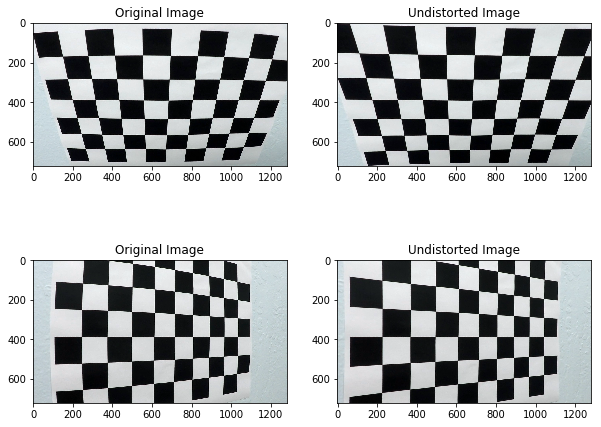

In [2]:
mtx, dist = process.calculate_camera_distortion()
%matplotlib inline
plt.figure(figsize=(10,8))

img = cv2.imread("camera_cal/calibration2.jpg")
img2 = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.title('Original Image')
fig =plt.imshow(img)

plt.subplot(2,2,2)
plt.title('Undistorted Image')
fig =plt.imshow(img2)


img = cv2.imread("camera_cal/calibration5.jpg")
img2 = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,3)
plt.title('Original Image')
fig =plt.imshow(img)

plt.subplot(2,2,4)
plt.title('Undistorted Image')
fig =plt.imshow(img2)

## 1.2 Example of undistorted images

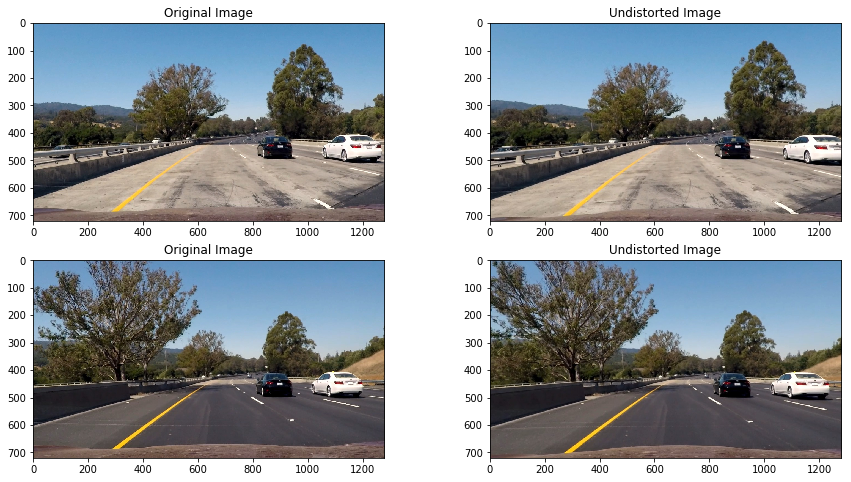

In [3]:
plt.figure(figsize=(15,8))

img = cv2.imread("test_images/test1.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.undistort(imgRGB, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.title('Original Image')
fig =plt.imshow(imgRGB)

plt.subplot(2,2,2)
plt.title('Undistorted Image')
fig =plt.imshow(img2)


img = cv2.imread("test_images/test6.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.undistort(imgRGB, mtx, dist, None, mtx)

plt.subplot(2,2,3)
plt.title('Original Image')
fig =plt.imshow(imgRGB)

plt.subplot(2,2,4)
plt.title('Undistorted Image')
fig =plt.imshow(img2)

# Step 2: Color and gradient threshold

In [4]:
def hls_select(img, thresh=(230, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    S = hls[:,:,2]
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    return binary_output

## Example S-channel filter

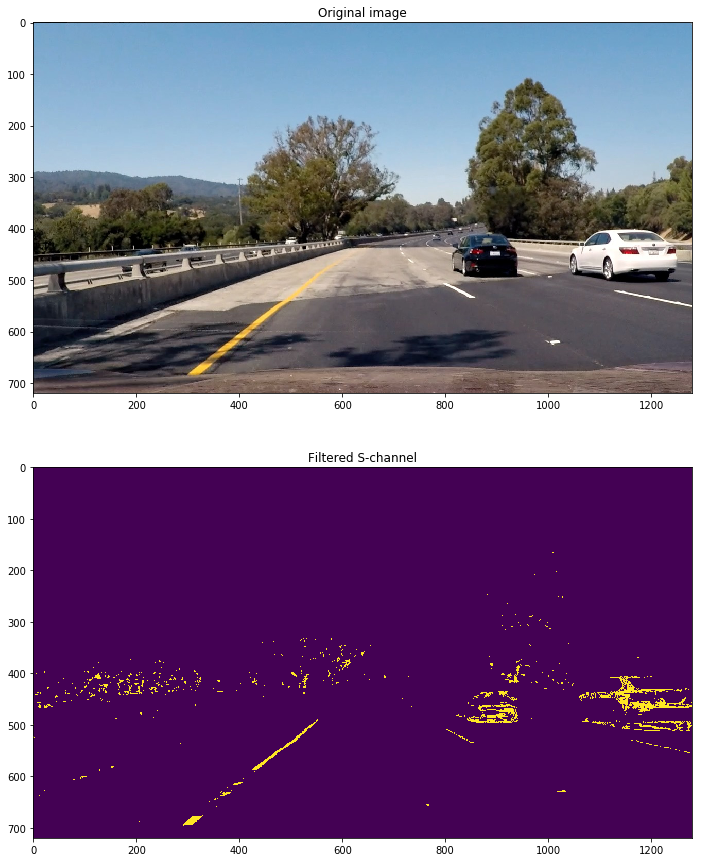

In [5]:
img = cv2.imread("test_images/test4.jpg")
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img_filtered = hls_select(img_undist)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Original image')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Filtered S-channel')
fig =plt.imshow(img_filtered)

In [6]:
def abs_sobel_x(img, thresh=(20, 100)):  
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

## Example sobel x filter

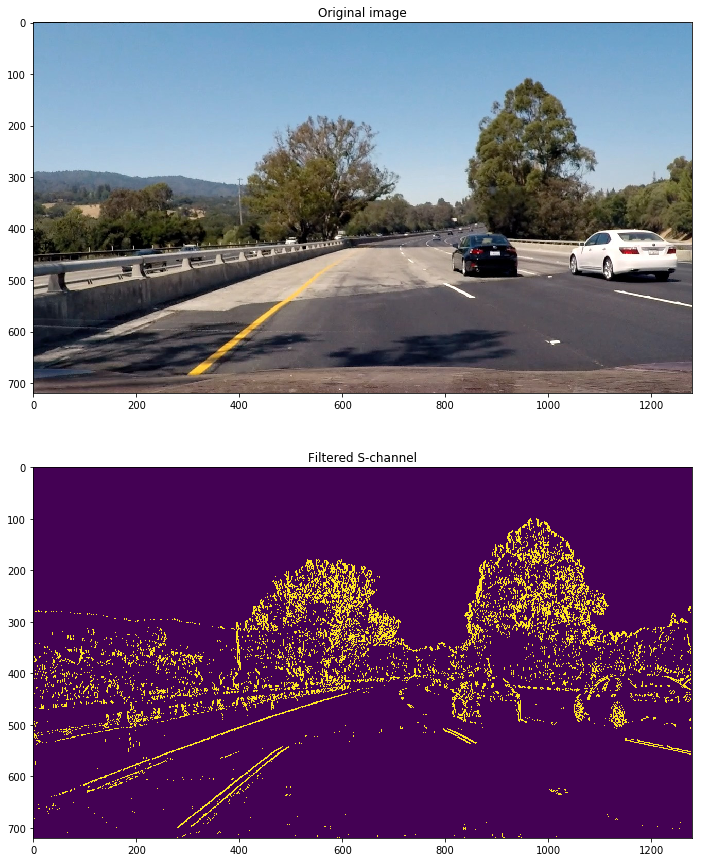

In [7]:
img = cv2.imread("test_images/test4.jpg")
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img_filtered = abs_sobel_x(img_undist)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Original image')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Filtered S-channel')
fig =plt.imshow(img_filtered)

## Example filters applied together

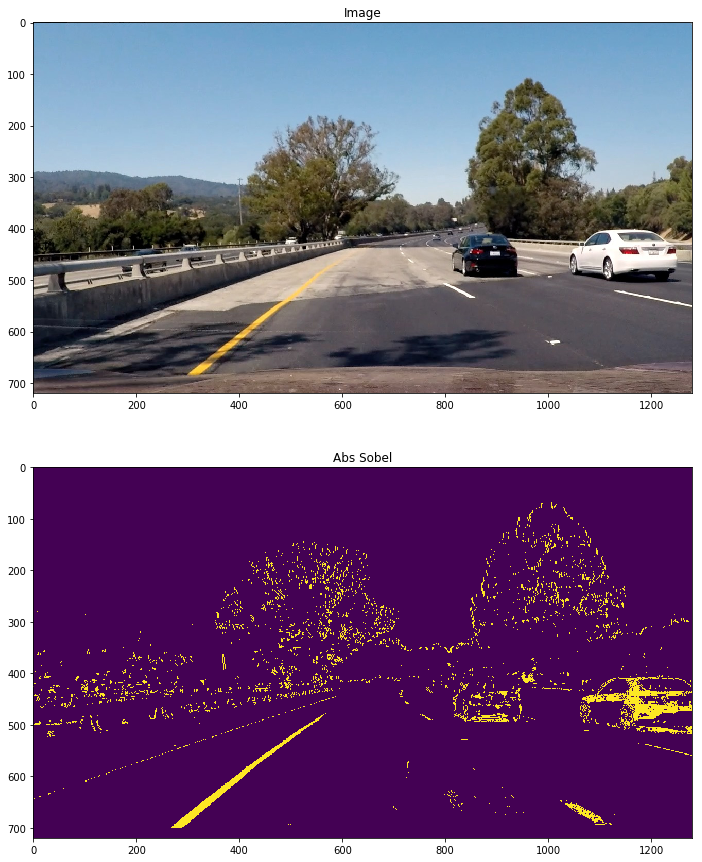

In [8]:
img = cv2.imread("test_images/test1.jpg")
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img2 = process.filter_pipeline_single_image(img_undist)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Image')
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Abs Sobel')
fig =plt.imshow(img2)

# Step 3: Birds eye view

In [9]:
M_persp, Minv_persp = process.get_perspective_transform_matrixes()

## Example of Birds eye view

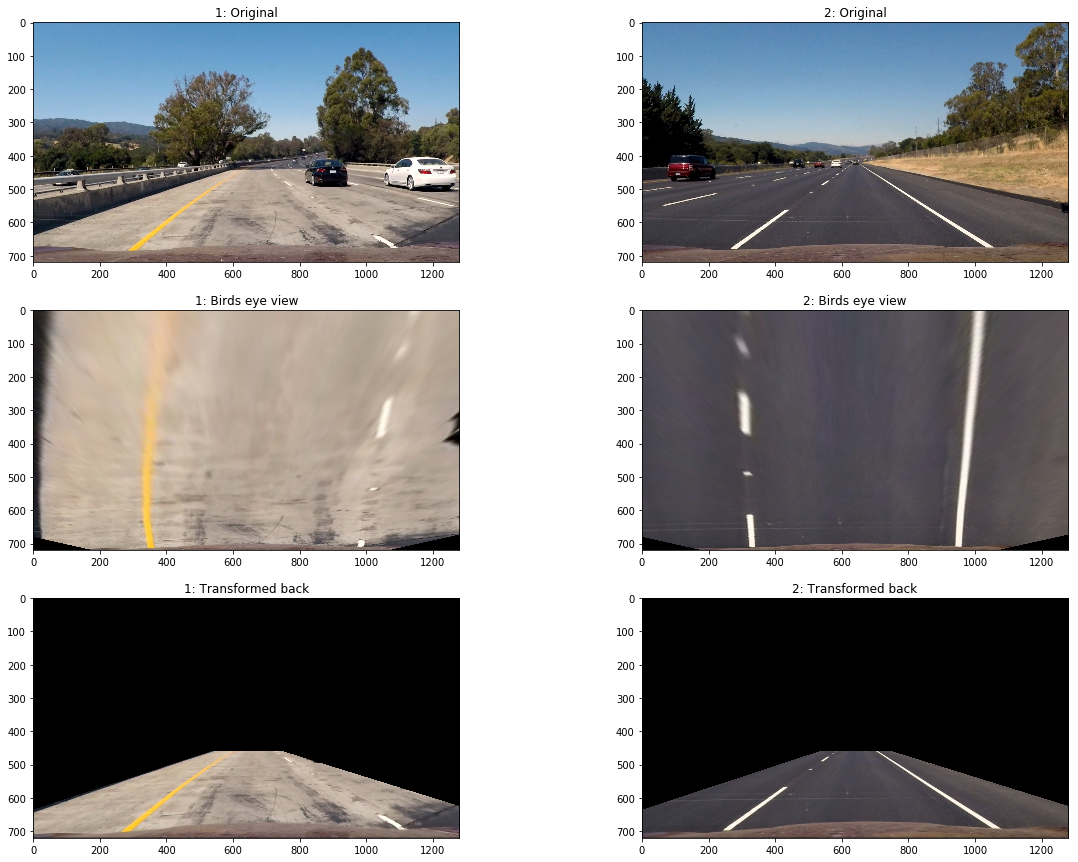

In [10]:
img1 = cv2.imread("test_images/test1.jpg")
img2 = cv2.imread("test_images/straight_lines2.jpg")

imgRGB1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_undist1 = cv2.undistort(imgRGB1, mtx, dist, None, mtx)
imgRGB2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_undist2 = cv2.undistort(imgRGB2, mtx, dist, None, mtx)

img_size1 = (img1.shape[1], img1.shape[0])
img_size2 = (img2.shape[1], img2.shape[0])

img1_warped = cv2.warpPerspective(img_undist1, M_persp, img_size1, flags=cv2.INTER_LINEAR)
img2_warped = cv2.warpPerspective(img_undist2, M_persp, img_size2, flags=cv2.INTER_LINEAR)


plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('1: Original')
fig =plt.imshow(imgRGB1)

plt.subplot(3,2,3)
plt.title('1: Birds eye view')
fig =plt.imshow(img1_warped)

img_unpersp1 = cv2.warpPerspective(img1_warped, Minv_persp, img_size1, flags=cv2.INTER_LINEAR)
plt.subplot(3,2,5)
plt.title('1: Transformed back')
fig =plt.imshow(img_unpersp1)

plt.subplot(3,2,2)
plt.title('2: Original')
fig =plt.imshow(imgRGB2)

plt.subplot(3,2,4)
plt.title('2: Birds eye view')
fig =plt.imshow(img2_warped)

img_unpersp2 = cv2.warpPerspective(img2_warped, Minv_persp, img_size2, flags=cv2.INTER_LINEAR)
plt.subplot(3,2,6)
plt.title('2: Transformed back')
fig =plt.imshow(img_unpersp2)

# Step 4: Lane detection and fit

leftx_base 371 rightx_base 998


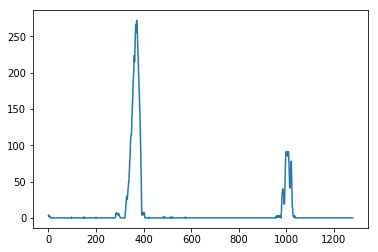

In [11]:
M_persp, _ = process.get_perspective_transform_matrixes()
img = cv2.imread("test_images/test2.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_undist = cv2.undistort(imgRGB, mtx, dist, None, mtx)
img_filtered = process.filter_pipeline_single_image(img_undist)
img_size = (img.shape[1], img.shape[0])
img_warped = cv2.warpPerspective(img_filtered, M_persp, img_size, flags=cv2.INTER_LINEAR)


histogram = np.sum(img_warped[img_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

print("leftx_base",leftx_base, "rightx_base",rightx_base)

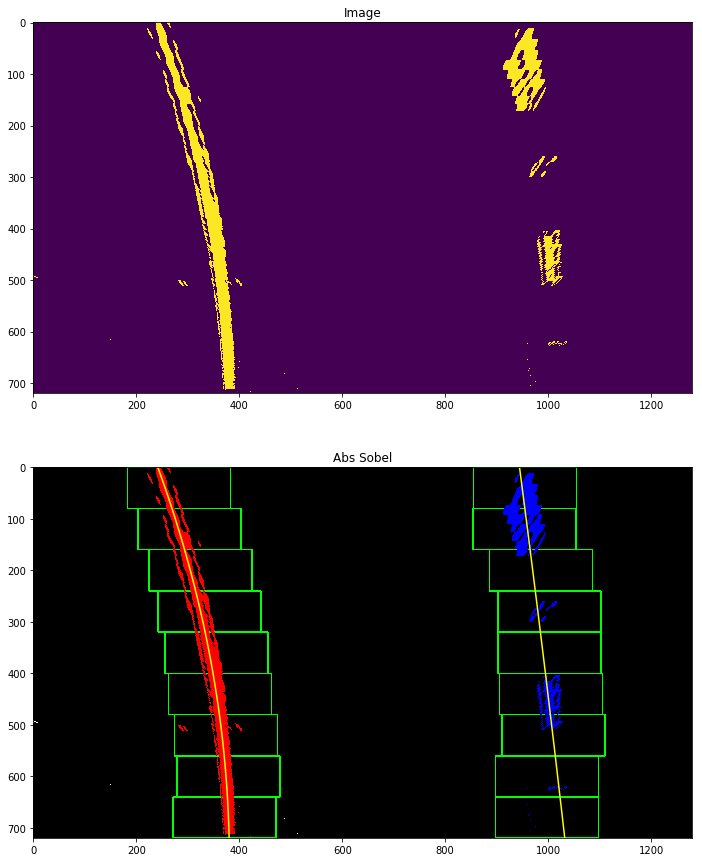

In [12]:
left_fit, right_fit,out_img = process.fit_lines(img_warped)
ploty = np.linspace(0, img_warped.shape[0]-1, img_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Image')
fig = plt.imshow(img_warped)

plt.subplot(2,1,2)
plt.title('Abs Sobel')
fig =plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

# Step 7: Full pipeline to work on video

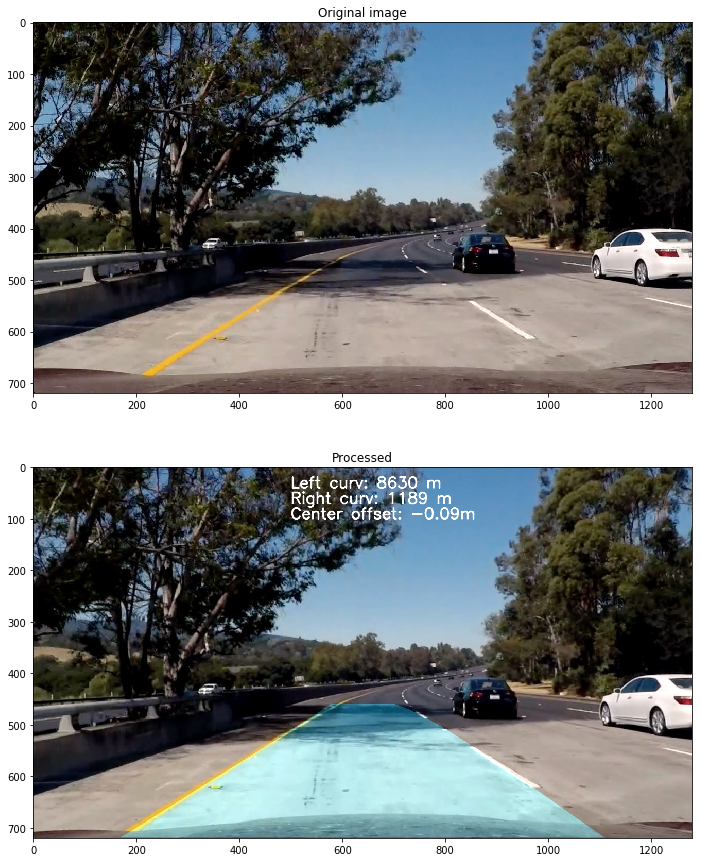

In [13]:
img = cv2.imread("test_images/test5.jpg")
img_processed = process.process_image(img, mtx, dist, M_persp, Minv_persp)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Original image')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Processed')
imgRGB_processed = cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB)
fig =plt.imshow(imgRGB_processed)

In [15]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
project_output = 'project.mp4'

#clip_project = VideoFileClip("project_video.mp4").subclip(40.8,42)
clip_project = VideoFileClip("project_video.mp4")
pro = lambda img: process.process_image(img, mtx, dist, M_persp, Minv_persp)
project_clip = clip_project.fl_image(pro)
%time project_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video project.mp4
[MoviePy] Writing video project.mp4


100%|█████████▉| 1260/1261 [03:21<00:00,  7.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project.mp4 

CPU times: user 3min 12s, sys: 47.3 s, total: 4min
Wall time: 3min 22s


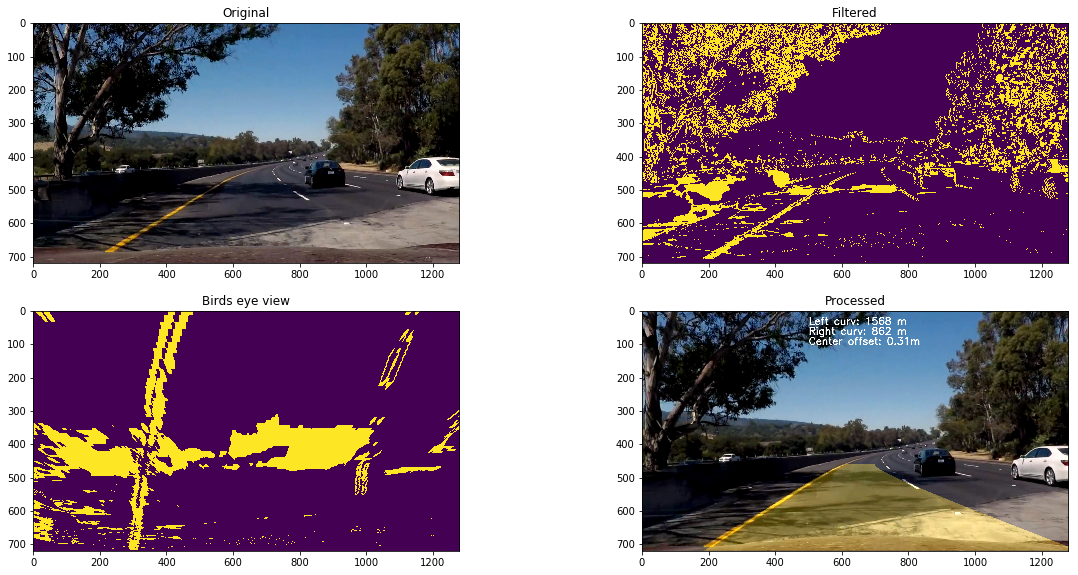

In [18]:
img = VideoFileClip("project_video.mp4").get_frame(41.5)
#img = VideoFileClip("project_video.mp4").get_frame(23.0)
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Original')
fig =plt.imshow(img)

img_undist = cv2.undistort(img, mtx, dist, None, mtx)

s_thresh=(150, 255)
sx_thresh=(20, 80)

img_filtered = process.filter_pipeline_single_image(img_undist, s_thresh, sx_thresh)
img_size = (img.shape[1], img.shape[0])
img_warped = cv2.warpPerspective(img_filtered, M_persp, img_size, flags=cv2.INTER_LINEAR)
processed = process.process_image(img, mtx, dist, M_persp, Minv_persp, s_thresh, sx_thresh)

plt.subplot(3,2,2)
plt.title('Filtered')
fig =plt.imshow(img_filtered)
plt.subplot(3,2,3)
plt.title('Birds eye view')
fig =plt.imshow(img_warped)
plt.subplot(3,2,4)
plt.title('Processed')
fig =plt.imshow(processed)